In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from gower import gower_matrix
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score, silhouette_samples

Load the data and split into features and targets

In [2]:
# Load the Titanic dataset
titanic_data = pd.read_csv('titanic_data.csv')

# Split the dataset into features and target
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

Scale the numerical features

In [4]:
scaler = MinMaxScaler()
X[['Age', 'Sibling_Spouse', 'Parent_Children', 'Fare']] = scaler.fit_transform(X[['Age', 'Sibling_Spouse', 'Parent_Children', 'Fare']])
X.head()

,Age,Sibling_Spouse,Parent_Children,Fare,Class,Sex,Embarked
0,0.384267,0.000,0.0,0.047138,3,male,Q
1,0.296306,0.000,0.0,0.015216,3,male,S
2,0.258608,0.125,0.0,0.019177,3,female,S
3,0.761247,0.000,0.0,0.063086,1,male,S
4,0.560191,0.000,0.0,0.015127,3,female,S


Function to calculate the purity

In [5]:
def compute_purity(labels, true_labels):
    contingency_matrix = confusion_matrix(true_labels, labels)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

Getting the optimal k by using the elbow method

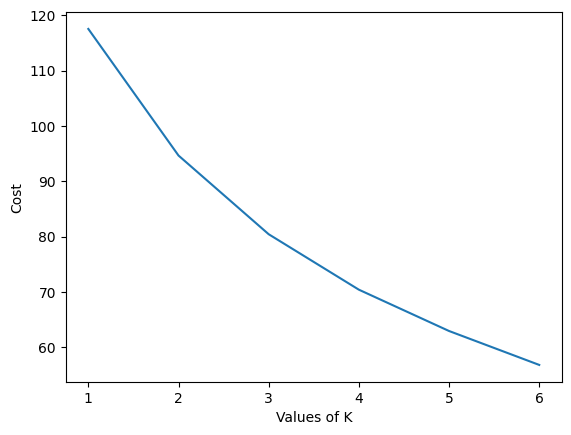

In [ ]:
cost = []
for num_clusters in list(range(2,7)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(X, categorical=[4,5,6])
    cost.append(kproto.cost_)
 
plt.plot(range(2,7) , cost)
plt.xlabel("Values of K")
plt.ylabel("Cost") 
plt.show()

Calculate the purity of the k-prototypes clusters for k=2 and k=3

In [7]:
# Perform clustering with 2 clusters
kproto = KPrototypes(n_clusters=2, init='Cao')
clusters = kproto.fit_predict(X, categorical=[4,5,6])

# Compute purity
purity = compute_purity(clusters, y)
print('Purity k=2:', purity)

# Perform clustering with 3 clusters
kproto = KPrototypes(n_clusters=3, init='Cao')
clusters = kproto.fit_predict(X, categorical=[4,5,6])

# Compute purity
purity = compute_purity(clusters, y)
print('Purity k=3:', purity)


Purity k=2: 0.7307692307692307
Purity k=3: 0.7064102564102565


Preparing the data for k-means by dropping categorical data

In [8]:
X = X.drop(['Class', 'Sex', 'Embarked'], axis=1)

Getting the optimal k by using silhouette score

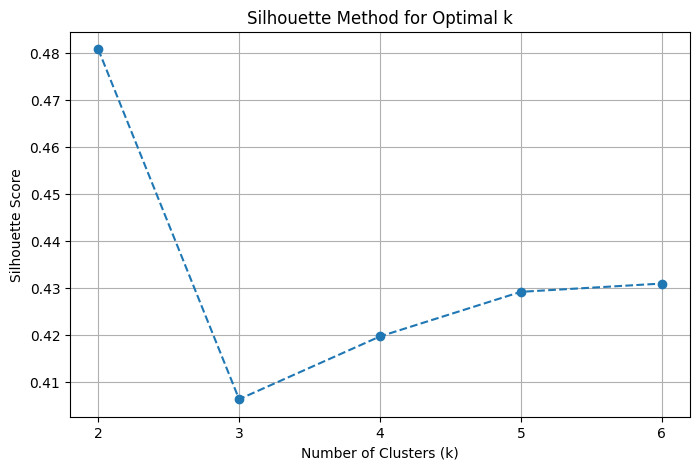

In [9]:
# Range of k values to try
k_values = range(2, 7)

# Store silhouette scores
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    
    score = silhouette_score(X, cluster_labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.title('Silhouette Method for Optimal k')
plt.grid()
plt.show()

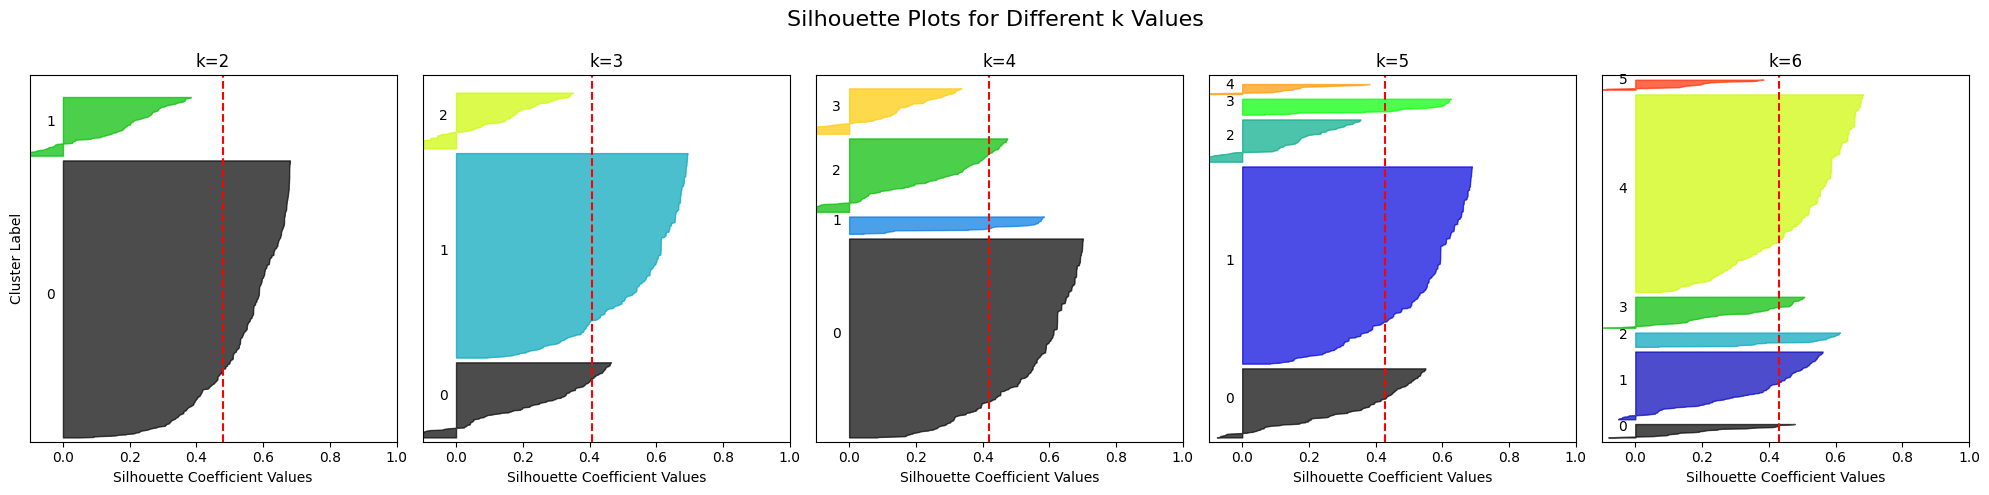

In [25]:
fig, axes = plt.subplots(1, len(k_values), figsize=(20, 5), sharey=True)
fig.suptitle("Silhouette Plots for Different k Values", fontsize=16)

# Loop through k values and create silhouette plots
for ax, k in zip(axes, k_values):
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    
    # Calculate silhouette scores
    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    y_lower = 10
    for i in range(k):
        # Get silhouette values for the current cluster and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Fill the silhouette plot for the cluster
        color = cm.nipy_spectral(float(i) / k)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)
        
        # Add cluster labels
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    
    # Draw the average silhouette score line
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_title(f"k={k}")
    ax.set_xlabel("Silhouette Coefficient Values")
    if k == 2:
        ax.set_ylabel("Cluster Label")
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(X) + (k + 1) * 10])
    ax.set_yticks([])

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

Calculate the purity of the k-means clusters for k=2, k=3 and k=4

In [28]:
# Fit the kMeans model with 2 clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Purity
purity = compute_purity(y_kmeans, y)
print(f"Purity n=2: {purity}")

# Fit the kMeans model with 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Purity
purity = compute_purity(y_kmeans, y)
print(f"Purity n=3: {purity}")

# Fit the kMeans model with 4 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Purity
purity = compute_purity(y_kmeans, y)
print(f"Purity n=4: {purity}")

Purity n=2: 0.5961538461538461
Purity n=3: 0.591025641025641
Purity n=4: 0.6025641025641025
